# Building ML Model App For Customer Churn Prediction.

## Problem Statement: 

It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not. 






###  Exited :

Bases upon independent feature we have to predict the customer will exited or not.

# Importing a Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve , roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import dataset
data = pd.read_csv(r'D:\Customer-Churn-Prediction-Project\Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# EDA(Exploratory Data Analysis)

In [3]:
#No of rows and columns.
data.shape

(10000, 14)

In [4]:
#Get information about dataset like columns name,Non-Null Value and their datatypes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#To check null value.
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#Get overall statistics about dataset.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
#It gives columns name.
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
#Drop irrelevant columns.
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [9]:
#It's shows top 1st five rows of the dataset.
data.head() 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding categorical data

In [10]:
#categorical values convert into numerical values
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
data = pd.get_dummies(data, drop_first = True)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


# Data Visualization

In [12]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='Exited', ylabel='count'>

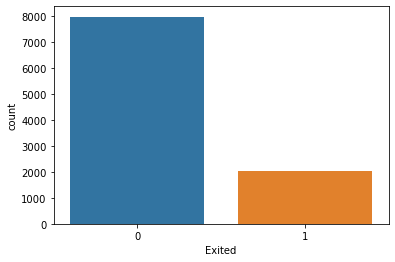

In [14]:
sns.countplot(data['Exited'])

# Model-Selection

In [15]:
# Dividing data independent and dependent

In [16]:
x = data.drop(columns=['Exited'])
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [17]:
y = data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [18]:
#!pip install scikit_learn

### Handling Imbalnace Data from SMOTE

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [21]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

### Splitting Dataset into Training and Testing Dataset

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train,y_test = train_test_split(x_res,y_res,test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()

In [26]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
x_train

array([[ 0.56670337,  0.49548054, -0.2915387 , ..., -0.57251627,
        -0.46125463, -0.84633753],
       [ 1.09329255,  0.09650307, -1.39761464, ..., -0.57251627,
        -0.46125463,  1.18156169],
       [ 0.20467331,  0.59522491,  0.07715328, ...,  1.74667524,
        -0.46125463,  1.18156169],
       ...,
       [ 0.1937027 ,  0.19624744,  1.18322923, ..., -0.57251627,
        -0.46125463,  1.18156169],
       [ 1.97094118,  0.49548054, -0.2915387 , ...,  1.74667524,
        -0.46125463, -0.84633753],
       [ 0.52282094,  0.99420239, -1.39761464, ...,  1.74667524,
        -0.46125463,  1.18156169]])

# Model Building:-


## 1.Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lg = LogisticRegression()

In [30]:
lg.fit(x_train , y_train)

LogisticRegression()

In [31]:
y_pred  = lg.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred)

0.7893910860012555

In [34]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [35]:
precision_score(y_test,y_pred)

0.7752808988764045

In [36]:
recall_score(y_test,y_pred)

0.7997424339987121

In [37]:
f1_score(y_test,y_pred)

0.7873217115689382

## 2.SVC

In [38]:
from sklearn.svm import SVC

In [39]:
svm = SVC()

In [40]:
svm.fit(x_train,y_train)

SVC()

In [41]:
y_pred2 = svm.predict(x_test)
y_pred2

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [42]:
accuracy_score(y_test,y_pred2)

0.8493408662900188

In [43]:
precision_score(y_test,y_pred2)

0.8384858044164037

In [44]:
recall_score(y_test,y_pred2)

0.8557630392788153

In [45]:
f1_score(y_test,y_pred2)

0.8470363288718928

## 3.KNN Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier()

In [48]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
y_pred3 = knn.predict(x_test)

In [50]:
accuracy_score(y_test,y_pred3)

0.8254865034526051

In [51]:
precision_score(y_test,y_pred3)

0.8098197638284649

## 4.Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt = DecisionTreeClassifier()

In [54]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred4 = dt.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred4)

0.7903327055869429

In [57]:
precision_score(y_test,y_pred4)

0.7693244065733414

## 5.Random forest classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rfc = RandomForestClassifier()

In [60]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
y_pred5 = rfc.predict(x_test)

In [62]:
accuracy_score(y_test,y_pred5)

0.864406779661017

In [63]:
precision_score(y_test,y_pred5)

0.8518518518518519

## 6.Gradient Boosting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gbc = GradientBoostingClassifier()

In [66]:
gbc.fit(x_train , y_train)

GradientBoostingClassifier()

In [67]:
y_pred6 = gbc.predict(x_test)

In [68]:
accuracy_score(y_test,y_pred6)

0.8477715003138732

In [69]:
precision_score(y_test,y_pred6)

0.8414322250639387

# Model Training

In [70]:
df=pd.DataFrame({'Model':['LogisticRegression','svc','KNeighborsClassifier',
                          'DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier'],
               'Accuracy_Score':[accuracy_score(y_test,y_pred),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6)],
                'Precision_Score':[precision_score(y_test,y_pred),
                                   precision_score(y_test,y_pred2),
                                  precision_score(y_test,y_pred3),
                                   precision_score(y_test,y_pred4),
                                   precision_score(y_test,y_pred5),
                                   precision_score(y_test,y_pred6)]})
df

,Model,Accuracy_Score,Precision_Score
0,LogisticRegression,0.789391,0.775281
1,svc,0.849341,0.838486
2,KNeighborsClassifier,0.825487,0.809820
3,DecisionTreeClassifier,0.790333,0.769324
4,RandomForestClassifier,0.864407,0.851852
5,GradientBoostingClassifier,0.847772,0.841432


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

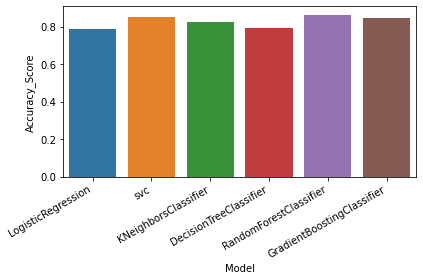

In [72]:
ax = sns.barplot(df['Model'],df['Accuracy_Score'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()
plt.show()

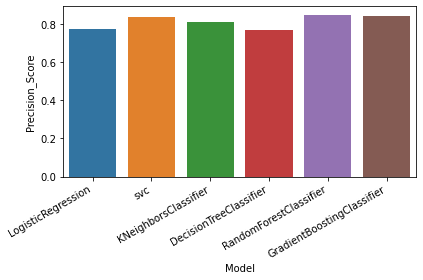

In [73]:
ax1 = sns.barplot(df['Model'],df['Precision_Score'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Save The Model

In [74]:
x_res = sc.fit_transform(x_res)

In [75]:
rfc.fit(x_res,y_res)

RandomForestClassifier()

In [76]:
import joblib

In [77]:
joblib.dump(rfc,'Customer_Churn_Model')

['Customer_Churn_Model']

In [78]:
model=joblib.load('Customer_Churn_Model')

In [79]:
x.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [80]:
model.predict([[700,32,5,50000,2,0,1,12500,0,0,1]])

array([0], dtype=int64)

In [81]:
#exited = 1
#stay in bank = 0

# GUI

In [82]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [83]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    if p9 == 1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9 == 2:
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9 == 3:
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1
    p10 = int(e10.get())
    model = joblib.load('Customer_Churn_Model')
    result = model.predict(sc.transform([[p1,p2,p3,p4,p5,p6,p7,p8,Geography_Germany,
             Geography_Spain,p10]]))
                                        
    if result == 0:
        Label(master , text='No Exit').grid(row=31)
    else:
        Label(master , text='Exit').grid(row=31)
    
master=Tk()
master.title("Customer Churn Prediction Using ML")

label = Label(master, text = 'Customer Churn Prediction Using ML',
             bg='black',fg='white').grid(row=0 ,columnspan=2)
                                         
    
Label(master, text="CreditScore").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Tenure").grid(row=3)
Label(master, text="Balance").grid(row=4)
Label(master, text="NumOfProduct").grid(row=5)
Label(master, text="HasCrCard").grid(row=6)
Label(master, text="IsActiveMember").grid(row=7)
Label(master, text="EstimatedSalary").grid(row=8)
Label(master, text="Geography").grid(row=9)
Label(master, text="Gender").grid(row=10)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)

Button(master, text='Predict', command=show_entry_fields).grid()
mainloop()